In [18]:
# imports
import numpy as np
import matplotlib.pyplot as plt

import os
os.sys.path.append('../scripts')
from proj1_helpers import load_csv_data

os.sys.path.append('../dataprocess')
from process import *

os.sys.path.append('../visualizations')
from correlation_vis import *
from distribution_vis import *


In [19]:
# load data

DATA_TRAIN_PATH = '../data/train.csv'
y_train, X_train, ids = load_csv_data(DATA_TRAIN_PATH, sub_sample=True)

In [20]:
def remove_nans(X, nan_val=-999.0):
    """
    Returns the dataset without the lines with Nan values. 
    """
    lines_with_missing = []
    for i in range(X.shape[0]):
        if any(X[i,:] == nan_val):
            lines_with_missing.append(i)
    lines_with_missing.reverse()
    for i in range(len(lines_with_missing)):
        X = np.delete(X, lines_with_missing[i], 0)
    return X

In [21]:
# clean data 

X_train = remove_nans(X_train, -999.)

In [22]:
# filter 's' and 'b'
lines_with_s = []
lines_with_b = []
for i in range(X_train.shape[0]):
    if y_train[i] == 1:
        lines_with_s.append(X_train[i, :])
    else:
        lines_with_b.append(X_train[i, :])
X_s = np.array(lines_with_s)
X_b = np.array(lines_with_b)

In [23]:
features = np.genfromtxt(DATA_TRAIN_PATH, delimiter=",",names=True).dtype.names
features = list(features)

In [24]:
# just visualization purposes choose only a few columns
cols = [4,6,14,15,16]

sub_X_t = X_train[:, cols]
sub_X_s = X_s[:, cols]
sub_X_b = X_b[:, cols]
sub_feat = [features[i] for i in cols]

# Visalizations of distributions

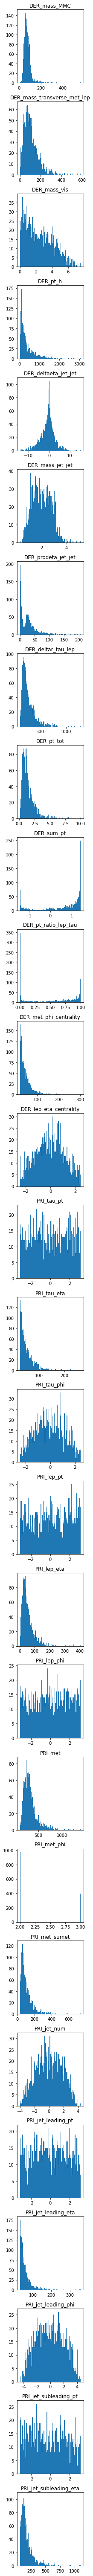

In [25]:
distibutions_plot(X_train[:,2:], features[2:])

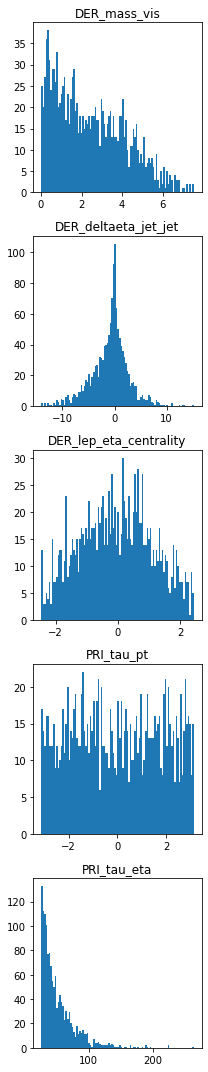

In [26]:
distibutions_plot(sub_X_t, sub_feat)

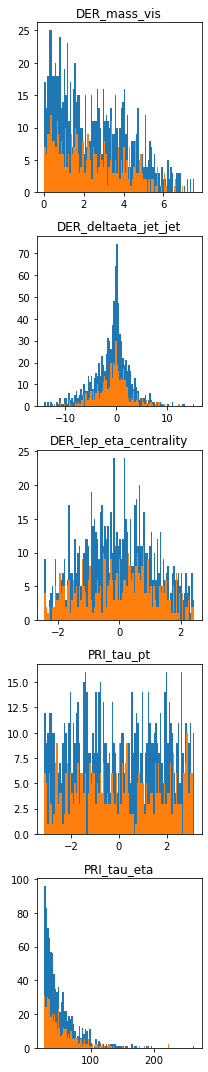

In [27]:
distributions_compare_plot(sub_X_b, sub_X_s, sub_feat)

# Visualizations for correlation

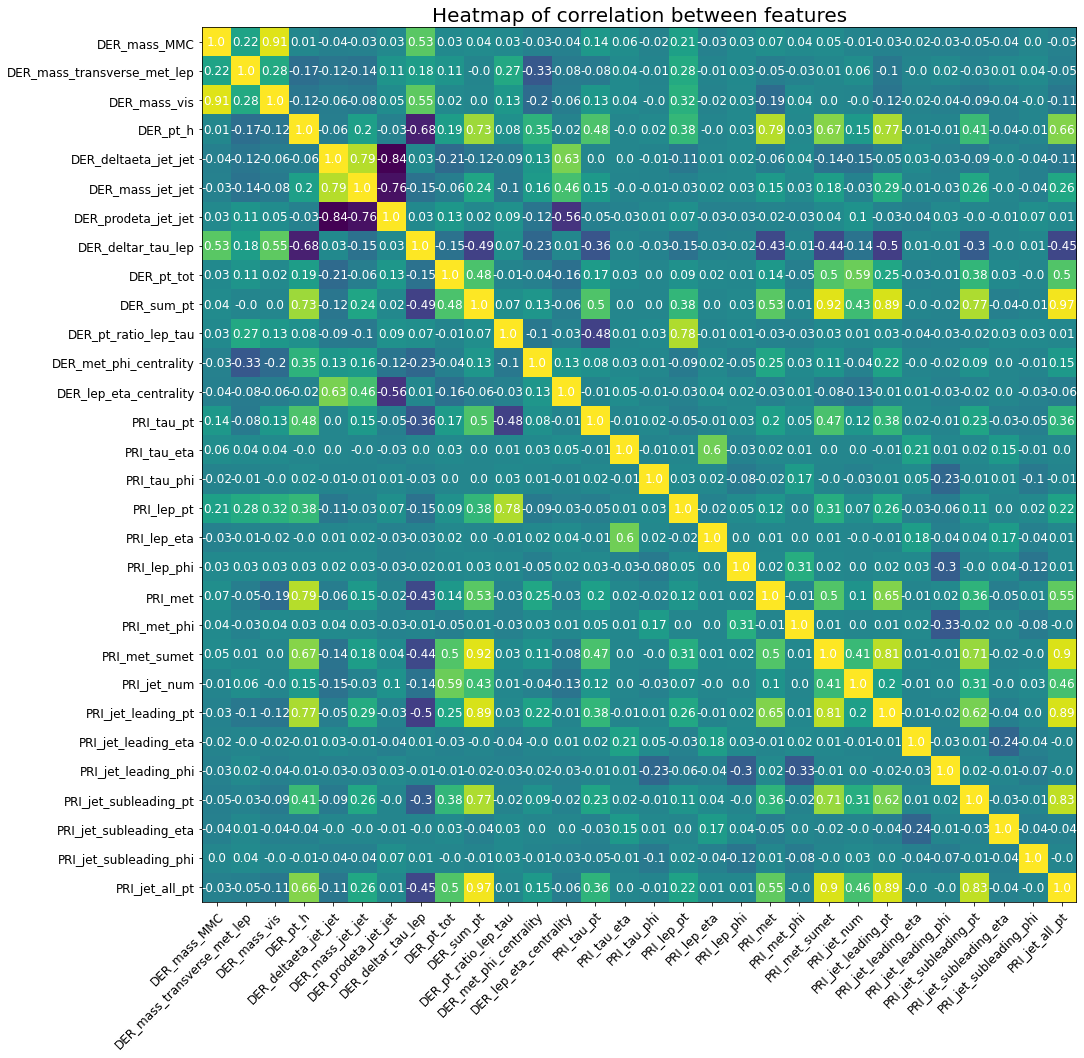

In [28]:
correlation_heatmap(X_train, features)

In [29]:
# it looks great but for the paper, we generate a submatrix, which only shows the highly correlated ones

In [30]:
# just visualization purposes choose only a few columns
cols = [3, 4, 5, 6, 9 , 21, 23, 26, 29]

sub_X_t = X_train[:, cols]
sub_feat = [features[i] for i in cols]
sub_featp = ['a','a']+sub_feat

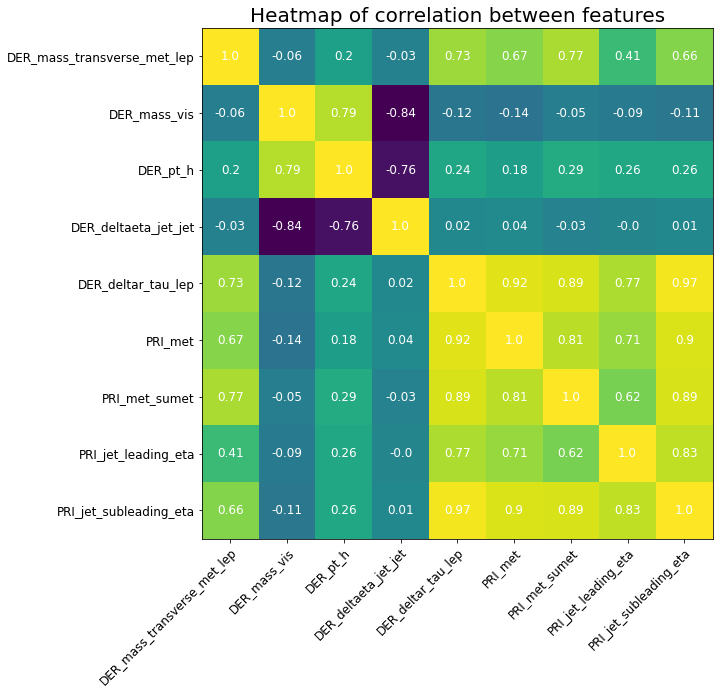

In [31]:
correlation_heatmap(sub_X_t, sub_featp)
